Data loading took 0.06 seconds.
Drop, encode and scale took 0.02 seconds.
Model training took 1.91 seconds.
                            precision    recall  f1-score   support

            andean_tinamou       0.55      0.60      0.57        10
        bartlett's_tinamou       0.55      0.60      0.57        10
       berlepsch's_tinamou       0.90      0.90      0.90        10
      black-capped_tinamou       0.80      0.80      0.80        10
             black_tinamou       0.46      0.60      0.52        10
         brazilian_tinamou       0.45      0.50      0.48        10
             brown_tinamou       0.67      0.80      0.73        10
         brushland_tinamou       0.57      0.80      0.67        10
    buff-browed_chachalaca       0.70      0.70      0.70        10
          chaco_chachalaca       0.40      0.60      0.48        10
chestnut-winged_chachalaca       0.50      0.40      0.44        10
         cinereous_tinamou       0.64      0.70      0.67        10
      c

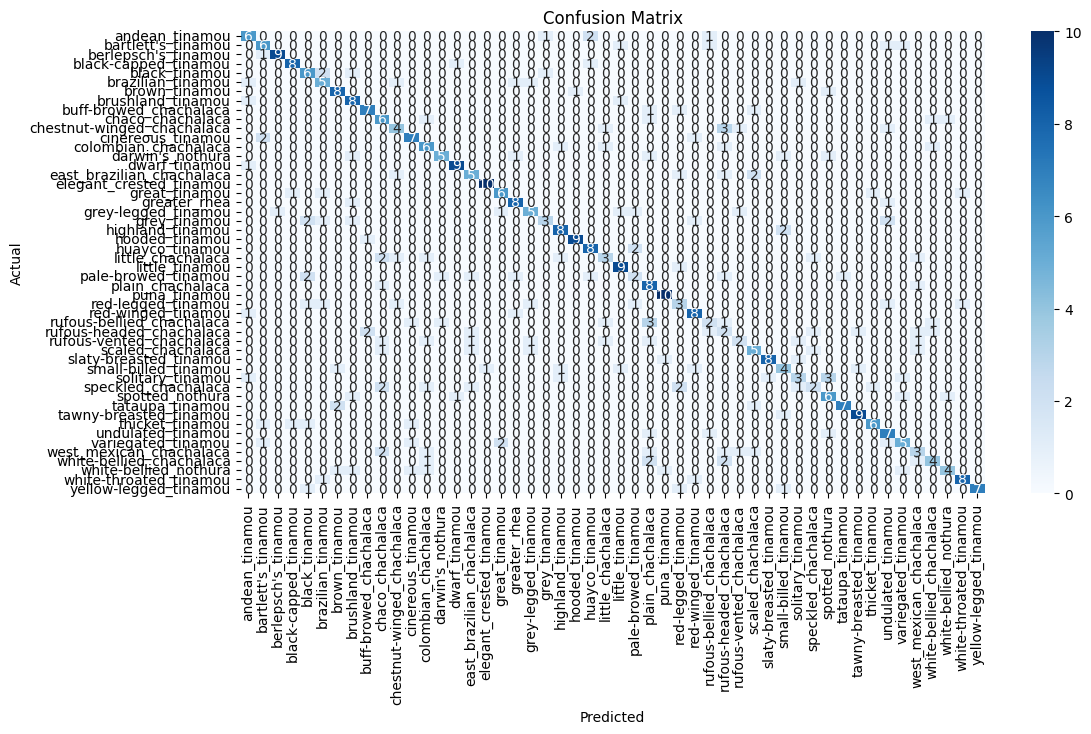

In [4]:
import time
import pandas as pd                                             # data handling
import matplotlib.pyplot as plt                                 # plotting
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  # convert categorical to numerical
from sklearn.svm import SVC                                     # support vector classifier for ML model
from sklearn.metrics import classification_report, confusion_matrix       # model evaluation
from pathlib import Path                                        # filesystem path management

# timing helper
def print_time(label, start_time):
    print(f"{label} took {time.time() - start_time:.2f} seconds.")

# Set base directory: if working inside a notebooks folder, go one level up
BASE_DIR = Path.cwd() if 'notebooks' not in str(Path.cwd()) else Path.cwd().parent

# Build the file paths
DATA_DIR = BASE_DIR / 'data'
PROCESSED_DATA_DIR = DATA_DIR / 'processed' / 'birdcall_segments_5s'
FEATURES_PATH = DATA_DIR / 'features' / 'birdcall_features_song.csv'

# Load the extracted features CSV
start = time.time()
features_df = pd.read_csv(FEATURES_PATH)
print_time("Data loading", start)

# Drop non-feature columns
start = time.time()
non_feature_cols = ['species', 'call_type', 'filename']
X = features_df.drop(columns=non_feature_cols)           # model will learn from these
y = features_df['species']                               # model will predict these

# Encode labels (turn species)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)      # standardize features (0 mean, 1 variance)
print_time("Drop, encode and scale", start)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train SVM
start = time.time()
clf = SVC(kernel='linear', probability=True, random_state=42)
clf.fit(X_train, y_train)
print_time("Model training", start)

# Evaluate
start = time.time()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print_time("Evaluation (prediction + report)", start)

# Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()